In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

f = open("./testdata/01_14T_01.dat")
ls = f.readlines()[2:-1]
sl = [ll.split() for ll in ls]
fl = [list(map(float, ll)) for ll in sl]
df = pd.DataFrame(fl)
df.columns = ['current', 'voltage']

In [2]:
newdf = df[~df.duplicated(subset='current')]
newdf = newdf.sort_values('current')

In [5]:
from scipy.interpolate import InterpolatedUnivariateSpline

In [7]:
f = InterpolatedUnivariateSpline(newdf['current'], newdf['voltage'], k=5)

In [8]:
xx = np.linspace(0, newdf['current'].max(), 1000)
yy = f(xx)

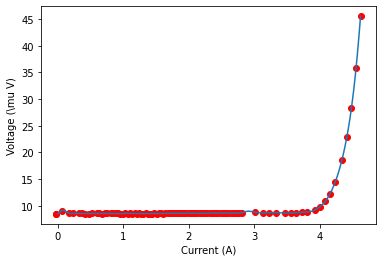

In [19]:
plt.xlabel('Current (A)')
plt.ylabel('Voltage (\mu V)')
plt.scatter(newdf['current'], newdf['voltage'], color='red')
plt.plot(xx, yy)
plt.savefig('splined.pdf', transparent=False)

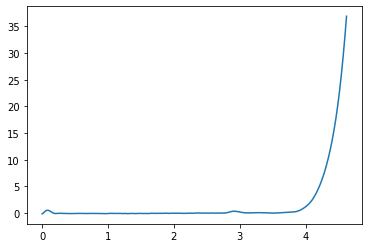

In [22]:
# ベースラインの削除
rangex = np.linspace(0, 10, 10000) # ベースラインのy範囲
size = len(xx)
alldata = dict()
sumdata = 1e10
for i in rangex:
    line = i * np.ones(size)
    after = yy - line
    absafter = np.abs(after)
    sumafter = np.sum(absafter)
    if sumafter < sumdata:
        sumdata   = sumafter
        alldata[sumdata] = i
        
aftery = yy - alldata[sumdata] * np.ones(size)
plt.plot(xx, aftery)

In [23]:
fnew = InterpolatedUnivariateSpline(xx, aftery-1)

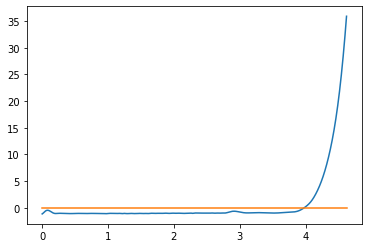

In [24]:
plt.plot(xx, fnew(xx))
plt.plot(xx, np.zeros(size))
plt.savefig('solver.pdf', dpi=300)

In [25]:
fnew.roots()

array([3.97988097])

array([-0.51396195])